# Import the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import spacy
import joblib
import os
import string
import matplotlib as mpl
import itertools    
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from tqdm import tqdm
from sklearn.utils import safe_indexing
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler

#  pip install yellowbrick==0.9.1 scikit-learn==0.22.2
from yellowbrick.text import FreqDistVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram
import mpld3

nltk.download('stopwords')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
from nltk import FreqDist
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
%matplotlib inline


e:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\Ap

# Reading the csv dataset

In [2]:
df = pd.read_csv('movie_info.csv')
df.head()

,locale_id,title,id_imdb,genre_imdb
0,1,Toy Story (1995),tt0114709,Animation|Adventure|Comedy|Family|Fantasy
1,2,GoldenEye (1995),tt0113189,Action|Adventure|Thriller
2,3,Four Rooms (1995),tt0113101,Comedy
3,4,Get Shorty (1995),tt0113161,Comedy|Crime|Thriller
4,5,Copycat (1995),tt0112722,Drama|Mystery|Thriller


### check if we have any null value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   locale_id   1682 non-null   int64 
 1   title       1682 non-null   object
 2   id_imdb     1601 non-null   object
 3   genre_imdb  1599 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.7+ KB


### Remove null

In [4]:
#remove null from df
df=df.dropna(how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   locale_id   1599 non-null   int64 
 1   title       1599 non-null   object
 2   id_imdb     1599 non-null   object
 3   genre_imdb  1599 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.5+ KB


# Reading the json dataset

In [5]:
#import json
data = pd.read_json('movie_synopsis.json')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
imdbID,tt0114709,tt0113189,tt0113101,tt0113161,tt0112722,tt0115012,tt0114746,tt0112431,tt0112818,tt0114279,...,tt0113827,tt0056215,tt0117781,tt0118117,tt0114592,NaN,tt0120594,tt0120148,tt0111804,tt0102855
plot_synopsis,A boy called Andy Davis (voice: John Morris) u...,"The story opens in 1986, in the Cold War Sovie...",The film begins with Ted the Bellhop (Tim Roth...,Chilli Palmer (John Travolta) is a loan shark ...,After giving a guest lecture on criminal psych...,Tang Shuisheng (Wang Xiaoxiao) has arrived in ...,The story is set in the indeterminate future. ...,"Babe, an orphaned piglet, is chosen for a ""gue...","A public housing project in New Orleans, LA. K...",In a fictitious alternate timeline of England ...,...,There's this detective dude who's hired to fol...,,,Jeremy Collier is a returning Vietnam War hero...,Angel celebrates the birth of his daughter by ...,"The film opens on two human forms, which soon ...",Alan (Jared Harris) is a schoolteacher in Lond...,The film follows Helen Quilley (Gwyneth Paltro...,,
local_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
plot_source,imdb,imdb,imdb,imdb,imdb,imdb,imdb,imdb,imdb,imdb,...,wiki,wiki,wiki,wiki,wiki,wiki,wiki,imdb,wiki,wiki


### rotate the json dataframe

In [6]:
data = data.transpose()
data.head()

,imdbID,plot_synopsis,local_id,plot_source
1,tt0114709,A boy called Andy Davis (voice: John Morris) u...,1,imdb
2,tt0113189,"The story opens in 1986, in the Cold War Sovie...",2,imdb
3,tt0113101,The film begins with Ted the Bellhop (Tim Roth...,3,imdb
4,tt0113161,Chilli Palmer (John Travolta) is a loan shark ...,4,imdb
5,tt0112722,After giving a guest lecture on criminal psych...,5,imdb


### check if we have any null value

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 1 to 1682
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   imdbID         1601 non-null   object
 1   plot_synopsis  1681 non-null   object
 2   local_id       1681 non-null   object
 3   plot_source    1678 non-null   object
dtypes: object(4)
memory usage: 130.2+ KB


### Remove null

In [8]:
#remove null from jason
data=data.dropna(how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   locale_id   1599 non-null   int64 
 1   title       1599 non-null   object
 2   id_imdb     1599 non-null   object
 3   genre_imdb  1599 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.5+ KB


# Merge dataFrames 

In [9]:
df =df.rename(columns = {'locale_id' :'local_id'})

#change datatype to merge
df["local_id"] = df["local_id"].astype(str)
data["local_id"] = data["local_id"].astype(str)

#merge dataFrames
movies = pd.merge(data, df, on = "local_id")
movies.head()

,imdbID,plot_synopsis,local_id,plot_source,title,id_imdb,genre_imdb
0,tt0114709,A boy called Andy Davis (voice: John Morris) u...,1,imdb,Toy Story (1995),tt0114709,Animation|Adventure|Comedy|Family|Fantasy
1,tt0113189,"The story opens in 1986, in the Cold War Sovie...",2,imdb,GoldenEye (1995),tt0113189,Action|Adventure|Thriller
2,tt0113101,The film begins with Ted the Bellhop (Tim Roth...,3,imdb,Four Rooms (1995),tt0113101,Comedy
3,tt0113161,Chilli Palmer (John Travolta) is a loan shark ...,4,imdb,Get Shorty (1995),tt0113161,Comedy|Crime|Thriller
4,tt0112722,After giving a guest lecture on criminal psych...,5,imdb,Copycat (1995),tt0112722,Drama|Mystery|Thriller


In [10]:
#remove unused columns
movies.drop(['imdbID', 'plot_source', 'id_imdb', "local_id"], axis=1 , inplace =True)
movies.head()

,plot_synopsis,title,genre_imdb
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1595
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   plot_synopsis  1596 non-null   object
 1   title          1596 non-null   object
 2   genre_imdb     1596 non-null   object
dtypes: object(3)
memory usage: 49.9+ KB


In [12]:
# remove empty plot_synopsis
movies.replace('', float("NaN"), inplace=True)
movies.dropna(inplace=True)
movies.dropna(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1593
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   plot_synopsis  1409 non-null   object
 1   title          1409 non-null   object
 2   genre_imdb     1409 non-null   object
dtypes: object(3)
memory usage: 44.0+ KB


In [13]:
#remove | and put genre_imdb to a list

genres = []
for i in movies['genre_imdb']:
    genres.append(i.split('|')) 
genres

[['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Drama', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'History', 'Romance', 'Thriller'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Comedy', 'Drama', 'Family'],
 ['Crime', 'Drama'],
 ['Drama', 'Sci-Fi', 'War'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Comedy', 'Drama', 'Fantasy', 'Romance'],
 ['Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Crime', 'Horror'],
 ['Drama', 'Family'],
 ['Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Adventure', 'Comedy', 'Family', 'Musical', 'Romance'],
 ['Biography', 'Drama', 'History', 'War'],
 ['Crime', 'Drama'],
 ['Action', 'Comedy', 'Crime', 'Thriller'],
 ['Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Thriller'],
 ['Adventure', 'Drama', 'History'],
 ['Action', 'Adventure'],
 ['Action', 'Drama', 'Thriller', 'War'],
 ['Action', '

# Preprocessing

In [14]:
# duplicate plot_synopsis to compare
movies['clean_plot'] = movies['plot_synopsis']
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,A boy called Andy Davis (voice: John Morris) u...
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,"The story opens in 1986, in the Cold War Sovie..."
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,The film begins with Ted the Bellhop (Tim Roth...
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,Chilli Palmer (John Travolta) is a loan shark ...
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,After giving a guest lecture on criminal psych...


### remove names

In [15]:
# remove names

def remove_name(text):
    with open('name.txt') as f:
        NAMES = set(f.read().splitlines())

    # find all the words that look like names
    pattern = r"(\b[A-Z][a-z]+('s)?\b)"
    found_names = re.findall(pattern, text)

    # get singular forms, and remove doubles
    found_names = set([name[0].replace("'s","") for name in found_names])

    # remove all the words that look like names but are not included in the NAMES
    found_names = [name for name in found_names if name in NAMES]

    # loop trough the found names and remove every name from the text
    for name in found_names:
        text = re.sub(name + "('s)?", "", text) # include plural forms

    return text
movies['clean_plot'] = movies['clean_plot'].apply(lambda x:remove_name(x))
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,A boy called (voice: ) uses his toys to act...
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,"The story opens in 1986, in the Cold War Sovie..."
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,The film begins with the Bellhop ( ) in a roo...
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,Chilli ( Travolta) is a loan shark living in ...
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,After giving a guest lecture on criminal psych...


### Lowercasing

In [16]:
# Lowercasing

movies['clean_plot']=movies['clean_plot'].str.lower()
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,a boy called (voice: ) uses his toys to act...
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,"the story opens in 1986, in the cold war sovie..."
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,the film begins with the bellhop ( ) in a roo...
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,chilli ( travolta) is a loan shark living in ...
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,after giving a guest lecture on criminal psych...


### clean text

In [17]:
def clean_text(text):

    #Replace special characters with spaces
    text = text.replace('-', ' ')
    text = text.replace('_', ' ')
    text = text.replace(',', ' ')
    text = text.replace('\\'," ")
    text = text.replace('.'," ")
    
    #Replace not contraction with not
    text = text.replace("'nt", " not")
    text = text.replace("n't", " not")
    
    #remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    
     
    #remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text)
    
    text = remove_name(text)
    return text

movies['clean_plot']=movies['clean_plot'].apply(clean_text)
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,a boy called voice uses his toys to act...
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,the story opens in in the cold war sovie...
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,the film begins with the bellhop in a roo...
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,chilli travolta is a loan shark living in ...
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,after giving a guest lecture on criminal psych...


### remove whitespace

In [18]:
#remove whitespace
def remove_whitespace(text):
    return  " ".join(text.split())

movies['clean_plot']=movies['clean_plot'].apply(remove_whitespace)
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,a boy called voice uses his toys to act out a ...
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,the story opens in in the cold war soviet unio...
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,the film begins with the bellhop in a room fil...
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,chilli travolta is a loan shark living in miam...
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,after giving a guest lecture on criminal psych...


### remove punctuation

In [19]:
#remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

movies['clean_plot']= movies['clean_plot'].apply(lambda x:remove_punctuation(x))
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,a boy called voice uses his toys to act out a ...
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,the story opens in in the cold war soviet unio...
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,the film begins with the bellhop in a room fil...
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,chilli travolta is a loan shark living in miam...
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,after giving a guest lecture on criminal psych...


### remove stopwords

##### add some extra words based on my dataset, except the "english" input stopwords. 
##### there are some frequent words such as "try", "allow", "take", that ain't no valuable or some proper names such as "chekhovs" , "gotham" that need to be remove and some of a Meaningless words

In [24]:
# remove stopwords function
def remove_stopwords(text):
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them']    
    stop_words = set(stopwords.words("english") + pronouns)
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text


movies['clean_plot'] = movies['clean_plot'].apply(remove_stopwords)
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,"[boy, called, voice, uses, toys, act, bank, ro..."
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,"[story, opens, cold, war, soviet, union, secre..."
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,"[begins, bellhop, room, filled, hotel, memorab..."
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,"[chilli, travolta, loan, shark, living, miami,..."
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,"[giving, guest, lecture, criminal, psychology,..."


### lemmatization

### Q1:

#### stemming VS lemmatization:
Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. For instance, stemming the word ‘Caring‘ would return ‘Car‘. Stemming is used in case of large dataset where performance is an issue.

 Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, lemmatizing the word ‘Caring‘ would return ‘Care‘. Lemmatization is computationally expensive since it involves look-up tables and what not.
 
 hence the only difference between lemma and stem is that lemma is an actual word whereas, the stem may not be an actual language word. Lemmatization uses a corpus to attain a lemma, making it slower than stemming. Further, to get the proper lemma, you might have to define a parts-of-speech. Whereas, in stemming a step-wise algorithm is followed making it faster


In [25]:
# lemmatization

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

movies['clean_plot']=movies['clean_plot'].apply(lemmatization)
movies.head()

,plot_synopsis,title,genre_imdb,clean_plot
0,A boy called Andy Davis (voice: John Morris) u...,Toy Story (1995),Animation|Adventure|Comedy|Family|Fantasy,"[boy, call, voice, use, toy, act, bank, robber..."
1,"The story opens in 1986, in the Cold War Sovie...",GoldenEye (1995),Action|Adventure|Thriller,"[story, open, cold, war, soviet, union, secret..."
2,The film begins with Ted the Bellhop (Tim Roth...,Four Rooms (1995),Comedy,"[begin, bellhop, room, fill, hotel, memorabili..."
3,Chilli Palmer (John Travolta) is a loan shark ...,Get Shorty (1995),Comedy|Crime|Thriller,"[chilli, travolta, loan, shark, live, miami, f..."
4,After giving a guest lecture on criminal psych...,Copycat (1995),Drama|Mystery|Thriller,"[give, guest, lecture, criminal, psychology, l..."


##### just showing what we have in each description. an example of first row

In [26]:
movies.iloc[0]['clean_plot']

['boy',
 'call',
 'voice',
 'use',
 'toy',
 'act',
 'bank',
 'robbery',
 'bank',
 'cardboard',
 'box',
 'robber',
 'potato',
 'head',
 'voice',
 'rickles',
 'assist',
 'slinky',
 'dog',
 'voice',
 'varney',
 'bystander',
 'include',
 'peep',
 'voice',
 'potts',
 'sheep',
 'day',
 'save',
 'cowboy',
 'doll',
 'voice',
 'hank',
 'play',
 'sheriff',
 'help',
 'dinosaur',
 'voice',
 'toy',
 'get',
 'line',
 'pull',
 'string',
 'make',
 'thing',
 'like',
 'reach',
 'sky',
 'youre',
 'favorite',
 'deputy',
 'open',
 'credit',
 'soundtrack',
 'youve',
 'friend',
 'take',
 'downstairs',
 'mother',
 'voice',
 'tcalf',
 'decorate',
 'din',
 'room',
 'birthday',
 'party',
 'asks',
 'decoration',
 'move',
 'mom',
 'agree',
 'say',
 'guest',
 'arrive',
 'sends',
 'upstairs',
 'baby',
 'sister',
 'voice',
 'unkrich',
 'whose',
 'crib',
 'room',
 'toss',
 'onto',
 'bed',
 'pull',
 'crib',
 'carry',
 'toy',
 'seem',
 'limp',
 'inanimate',
 'point',
 'leave',
 'room',
 'sits',
 'express',
 'surprise',


## top 20 most frequent words plot

In [27]:
# get a freq words plot
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
  
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(12,15))
    ax = sns.barplot(data=d, x= "count", y = "word" , color = "pink")
    ax.set(ylabel = 'Word')
plt.show()

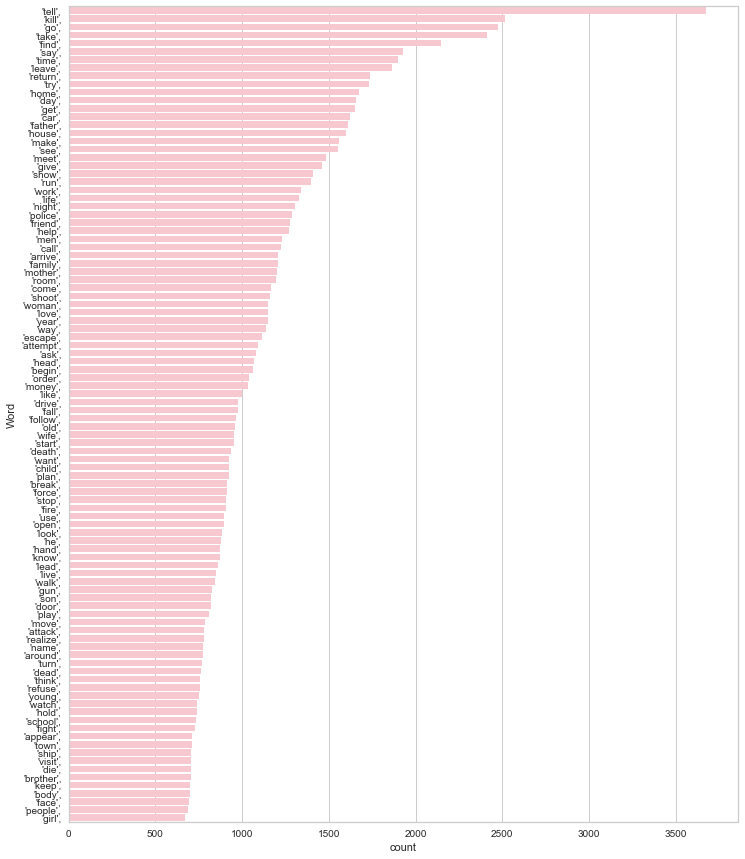

In [28]:
movies['clean_plot'] = movies['clean_plot'].astype(str)
freq_words(movies['clean_plot'], 100)

## Word Frequency

In [29]:
n_plots = len(movies['clean_plot'])
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = movies['clean_plot'].map(str)
tfidf=True

In [30]:
# Word Frequency
cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")


Terms with Highest Frequency:
tell            3681
kill            2522
go              2478
take            2417
find            2149
say             1931
time            1903
leave           1868
return          1744
try             1733
home            1687
day             1666
get             1653
car             1625
father          1617
house           1602
make            1560
see             1552
meet            1486
give            1462
show            1412
run             1397
life            1360
work            1352
night           1311
police          1297
friend          1289
help            1274
men             1230
call            1222
family          1214
arrive          1210
mother          1206
room            1196
year            1173
come            1171
shoot           1164
love            1161
woman           1156
way             1142
escape          1117
attempt         1094
begin           1094
ask             1079
head            1075
order           1040
mon

### for better observation we want to show the genres Frequency plot

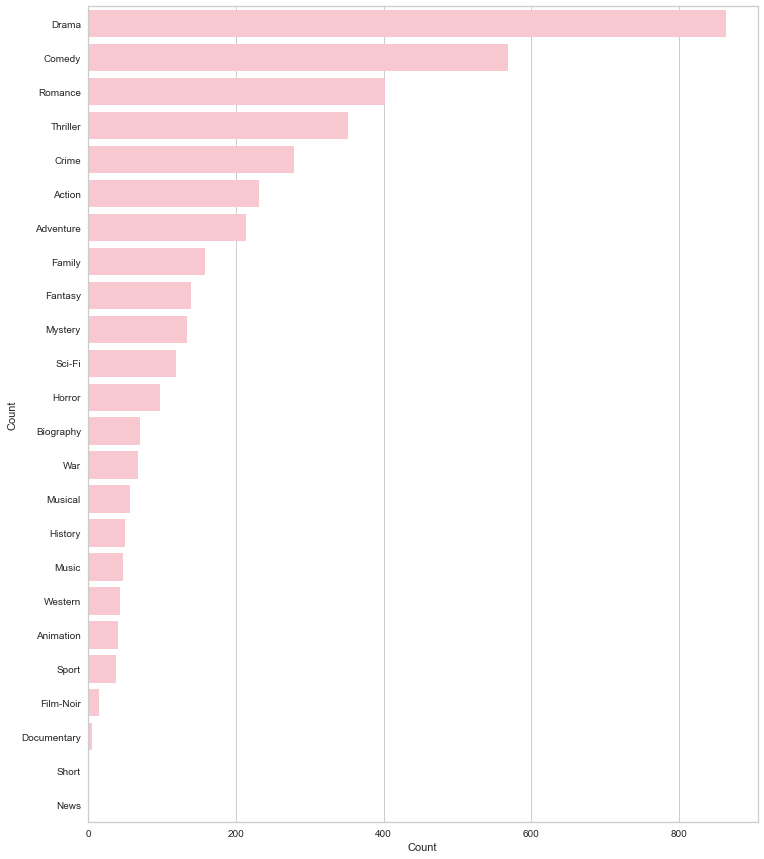

In [32]:
all_genres = sum(genres,[])
len(set(all_genres))

all_genres = nltk.FreqDist(all_genres)
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre" , color='pink')
ax.set(ylabel = 'Count')
plt.show()

# Distribution of words in plot for each genre

In [33]:
def freq_dist_of_words_for_each_genre(genre):
    plot = movies.loc[movies['genre_imdb'].str.contains(genre), ['clean_plot']]
    plotlist = [x for x in plot['clean_plot'].str.split()]
    plotlist = list(itertools.chain(*plotlist))

    count = CountVectorizer()
    docs     = count.fit_transform(plotlist)
    features = count.get_feature_names()

    fig = plt.figure(figsize=(10, 10))
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 10)
    plt.gcf().subplots_adjust(left=0.15)
    
    
    visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
    visualizer.fit(docs)

# Example of crime genre

duo to this Distribution and related words, we underestand that we're in a good terms.

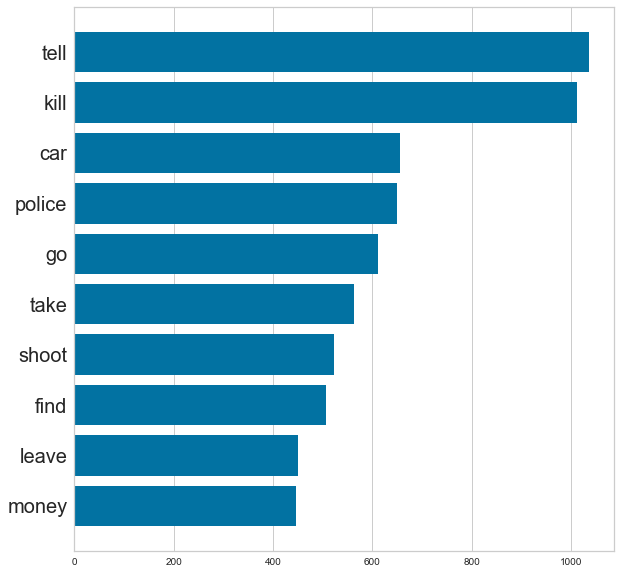

In [34]:
# Crime
freq_dist_of_words_for_each_genre("Crime")

# Feature Extraction

## Q2:
### Name Some Techniques of Feature Extraction?
1. One Hot Encoding
2. Bag of Word (BOW)
3. n-grams
4. Tf-Idf
5. Custom features
6. Word2Vec(Word Embedding)

### Explaination of Bag of Words:
It is one of the most used text vectorization techniques. A bag-of-words is a representation of text that describes the occurrence of words within a document. Specially used in the Text Classification task.

Advantage
1. Simple and intuitive.
2. Size of each document after BOW same.
3. Out of Vocabulary (OOV) problem does not occur, which means the model does not give an error.

Disadvantage
1. BOW also creates Sparsity.
2. OOV, Ignoring the new word.
3. Not consider sentence ordering issues.

## We use TF IDF

In [35]:
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Conducting Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, max_features=None, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], 
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')

Conducting Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 1409  rows, and 14001  columns.
The Term list has 14001  terms.

Terms with Highest TF-IDF Scores:
tell              38.11
kill              35.08
father            31.00
go                29.59
take              28.50
find              27.21
house             26.59
home              26.41
family            26.12
day               25.07
love              25.02
mother            24.98
return            24.71
time              24.68
car               24.32
leave             24.19
life              23.87
police            23.81
friend            23.59
get               23.11
say               22.63
try               22.60
meet              22.55
woman             21.47
work              21.39
money             21.07
make              20.81
year              20.73
child             20.41
night             20.29
show              20.27
run               20.04
see               19.97
give              19.79
help     

###  Creating a dataframe of all frequent words from count vectorizer

In [36]:
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)
# Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[250] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)
freq.t.head(20)

<ipython-input-36-e15aba6a1810>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  freq.t = freq.T


,0,1,2,3,4,5,6,7,8,9,...,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409
bug,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,107
squad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,103
planet,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,187
surface,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,121
infantry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
learn,0,0,0,1,0,1,1,2,0,0,...,1,0,0,0,0,0,0,0,1,600
kill,1,7,0,5,9,3,3,2,9,1,...,0,1,3,0,0,0,0,0,0,2522
military,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,170
leader,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,241
roughneck,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


### one hot encoding based on title and freq words

it shows that for example, the first movie in the list of dataframe has all the (tell,kill,go,take,find,say,time) words and the second one just doesnt have the word "time".

1 means being in the description of the movie and 0 means not being.

In [37]:
# Taking top words from the entire dataframe based on freq words plot
words_df = freq.t.T
top_words = ['tell', 'kill', 'go', 'take', 'find', 'say', 'time']

df = words_df[top_words]
df_encoded = df
df_encoded[df_encoded!=0] = 1
df_encoded.head()

<ipython-input-37-118e987d9b9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[df_encoded!=0] = 1
e:\Anaconda3\lib\site-packages\pandas\core\frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,tell,kill,go,take,find,say,time
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,0
2,1,0,1,1,1,1,1
3,1,1,1,1,1,0,0
4,0,1,0,1,1,1,1


### now we concat the column "title" to df_encoded framwork

In [38]:
df_final2 = pd.concat([movies, df_encoded], axis=1)
df_final2 = df_final2.drop(['genre_imdb','plot_synopsis', 'clean_plot'],axis = 1)
df_final2

,title,tell,kill,go,take,find,say,time
0,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,GoldenEye (1995),1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,Four Rooms (1995),1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Get Shorty (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,Copycat (1995),0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1590,"War at Home, The (1996)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591,Sweet Nothing (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1592,B. Monkey (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1593,Sliding Doors (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN


## remove NaN

In [39]:
# remove NaN
df_final2.dropna(inplace=True)
df_final2.head()
df_dbscan=df_final2
df_final2.head()

,title,tell,kill,go,take,find,say,time
0,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,GoldenEye (1995),1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,Four Rooms (1995),1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Get Shorty (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,Copycat (1995),0.0,1.0,0.0,1.0,1.0,1.0,1.0


# Processing Data

## Q3:

### we use KMeans for clustring:
K-means is an Unsupervised algorithm as it has no prediction variables. It will assign each data point randomly to some clusters.  It will just find patterns in the data. This process will continue until the cluster variation with in the data can’t be reduced any further

It is easy to implement k-means and identify unknown groups of data from complex data sets. The results are presented in an easy and simple manner. K-means segmentation is linear in the number of data objects thus increasing execution time. It doesn’t take more time in classifying similar characteristics in data.

In [40]:
mms = MinMaxScaler()
mms.fit(df_encoded)
data_transformed = mms.transform(df_encoded)

In [41]:
titles = movies['title'].tolist()
synopses = movies['clean_plot'].tolist()
genres = [genres.append(i.split('|')) for i in movies['genre_imdb']]

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)

#fit the vectorizer to synopses
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

In [42]:
terms = tfidf_vectorizer.get_feature_names()
dist = 1 - cosine_similarity(tfidf_matrix)

## Elbow 

#### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

We can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

In [43]:
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_transformed)
    distortions.append(kmeanModel.inertia_)


#### Plotting the distortions of K-Means

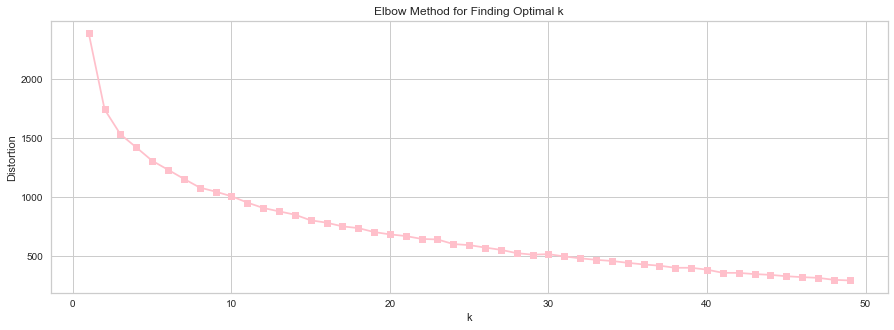

In [44]:
plt.figure(figsize=(15,5))
plt.plot(K, distortions, 's-' , markersize=7, color='pink', mec='gray')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Finding Optimal k')
plt.show()

##### Hence from the above graph since the value changes at around 15 ,using the elbow technique the value must be around 15

## KMeans clustering

In [45]:
num_clusters = 15

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

## PostProcessing
### Q4:

### this table shows that each movie belongs to which cluster
for instanse: the movie "GoldenEye (1995)" and "Get Shorty (1995)" belongs to same the cluster and it means these movies are in a same catagory and are similar to each other

now we want to know that what are these movies about? 

In [46]:
joblib.dump(km, 'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
films = { 'title': titles, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }
frame = pd.DataFrame(films, index = [clusters] , columns = ['title', 'cluster', 'genre'])
frame['cluster'].value_counts()
frame

,title,cluster,genre
0,Toy Story (1995),0,None
10,GoldenEye (1995),10,None
9,Four Rooms (1995),9,None
10,Get Shorty (1995),10,None
10,Copycat (1995),10,None
...,...,...,...
7,Mirage (1995),7,None
3,"War at Home, The (1996)",3,None
4,Sweet Nothing (1995),4,None
4,B. Monkey (1998),4,None


#### in Cluster number 10 we have these words:
 kill, money, shoot, police, car,
 
 it determinds that those two movies above(GoldenEye (1995) and Get Shorty (1995)) are in these concepts and we can kinda even guess the genres. 
thay must be in cime, police, shooting concepts

In [47]:
print("Top words per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :5]:
        print (' %s' % terms[ind], end=',')
    print()

Top words per cluster:
Cluster 0:
 dog, buzz, fluke, yellow, wilby,
Cluster 1:
 team, game, player, win, play,
Cluster 2:
 ship, crew, alien, team, creature,
Cluster 3:
 house, home, family, father, school,
Cluster 4:
 aunt, family, love, father, marry,
Cluster 5:
 castle, knight, dartagnan, musketeer, sheriff,
Cluster 6:
 vampire, case, blood, acula, dracula,
Cluster 7:
 woman, life, time, love, father,
Cluster 8:
 relationship, brother, father, wed, love,
Cluster 9:
 tell, say, room, day, car,
Cluster 10:
 kill, money, shoot, police, car,
Cluster 11:
 band, song, play, pod, police,
Cluster 12:
 love, family, woman, affair, life,
Cluster 13:
 police, cat, thief, jewel, kill,
Cluster 14:
 mother, boy, child, juror, doctor,
